In [2]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('premier-league-matches.csv')

# Display the first few rows of the DataFrame
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


In [4]:
df_copy = df.copy()

In [5]:
irrelevant_columns = ['Season_End_Year', 'Wk', 'Date']

# Remove irrelevant columns from the copied dataset
df_copy.drop(columns=irrelevant_columns, inplace=True)


print(df_copy.head())

             Home  HomeGoals  AwayGoals            Away FTR
0   Coventry City          2          1   Middlesbrough   H
1    Leeds United          2          1       Wimbledon   H
2   Sheffield Utd          2          1  Manchester Utd   H
3  Crystal Palace          3          3       Blackburn   D
4         Arsenal          2          4    Norwich City   A


In [6]:
import pandas as pd

# List of team names
team_names = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
              'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
              'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
              'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
              'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
              'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
              'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
              'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
              'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
              'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Create a list to store dummy DataFrames
dummy_dfs = []

# Create a DataFrame for each team indicating whether they are playing at home or away
for team in team_names:
    df_home = pd.DataFrame({f'{team}_home': (df_copy['Home'] == team).astype(int)})
    df_away = pd.DataFrame({f'{team}_away': (df_copy['Away'] == team).astype(int)})
    dummy_dfs.extend([df_home, df_away])

# Concatenate all dummy DataFrames along columns axis
df_dummy = pd.concat(dummy_dfs, axis=1)

# Drop the original 'Home' and 'Away' columns from df_copy
df_copy.drop(columns=['Home', 'Away'], inplace=True)

# Concatenate df_copy with df_dummy
df_copy = pd.concat([df_copy, df_dummy], axis=1)

# Print the DataFrame to verify the changes
print(df_copy.head())


   HomeGoals  AwayGoals FTR  Middlesbrough_home  Middlesbrough_away  \
0          2          1   H                   0                   1   
1          2          1   H                   0                   0   
2          2          1   H                   0                   0   
3          3          3   D                   0                   0   
4          2          4   A                   0                   0   

   Wimbledon_home  Wimbledon_away  Manchester Utd_home  Manchester Utd_away  \
0               0               0                    0                    0   
1               0               1                    0                    0   
2               0               0                    0                    1   
3               0               0                    0                    0   
4               0               0                    0                    0   

   Blackburn_home  ...  Cardiff City_home  Cardiff City_away  \
0               0  ...            

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'FTR' column in df_copy
df_copy['FTR'] = label_encoder.fit_transform(df_copy['FTR'])

# Print the mapping of original categories to numerical values
print("Mapping of original categories to numerical values:")
for category, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {numerical_value}")

Mapping of original categories to numerical values:
A: 0
D: 1
H: 2


In [16]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
features = df_copy.drop(columns=['FTR'], axis=1)
targets = df_copy['FTR']

In [18]:
features.head()

,HomeGoals,AwayGoals,Middlesbrough_home,Middlesbrough_away,Wimbledon_home,Wimbledon_away,Manchester Utd_home,Manchester Utd_away,Blackburn_home,Blackburn_away,...,Cardiff City_home,Cardiff City_away,Bournemouth_home,Bournemouth_away,Huddersfield_home,Huddersfield_away,Brighton_home,Brighton_away,Brentford_home,Brentford_away
0,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
targets.head()

0    2
1    2
2    2
3    1
4    0
Name: FTR, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, test_size=.2)

In [21]:
len(x_train)

9620

In [22]:
len(x_test)

2406

In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
df_copy['FTR'].value_counts(normalize=True)

FTR
2    0.458922
0    0.283552
1    0.257525
Name: proportion, dtype: float64

In [25]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

1.0
1.0


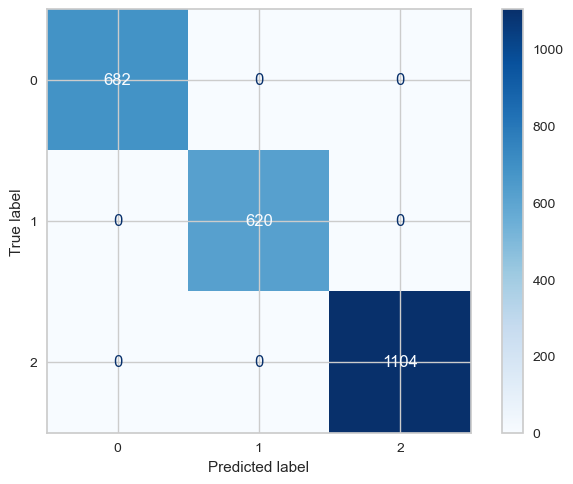

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

#gather the predictions for our test dataset
predictions = lr_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers (excluding SVM)
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(x_train, y_train)
    
    # Predictions
    y_pred = clf.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

# Select the best-performing classifier based on evaluation metrics
best_classifier_name = max(classifiers, key=lambda k: accuracy_score(y_test, classifiers[k].predict(x_test)))
best_classifier = classifiers[best_classifier_name]

print(f"The best-performing classifier is: {best_classifier_name}")

Training Logistic Regression...
Evaluation results for Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       620
           2       1.00      1.00      1.00      1104

    accuracy                           1.00      2406
   macro avg       1.00      1.00      1.00      2406
weighted avg       1.00      1.00      1.00      2406

--------------------------------------------------
Training Decision Tree...
Evaluation results for Decision Tree:
Accuracy: 0.999168744804655
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       620
           2       1.00      1.00      1.00      1104

    accuracy                           1.00      2406
   macro avg       1.00      1.00      1.00      2406
weighted avg  